In [1]:
import os
import tarfile
import urllib

In [2]:
def download(url,path):
    os.makedirs(path,exist_ok=True)  #make dirctory recusively
    file_path=os.path.join(path,'house.tgz')  #filepath what name and where you want your file save
    urllib.request.urlretrieve(url,file_path) #download file from url and save at file_path
    tgz=tarfile.open(file_path) 
    tgz.extractall(path=path)
    tgz.close()
download("https://github.com/ageron/data/raw/main/housing.tgz","dataset/hosing")    
    
    

In [3]:
import pandas as pd
def load_csv(file_path):
    return pd.read_csv(file_path)
file_path="dataset/hosing/housing/housing.csv"
housing_ds=load_csv(file_path)
housing_ds.head()    

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing_ds.info()
housing_ds.index

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


RangeIndex(start=0, stop=20640, step=1)

In [5]:
housing_ds["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
housing_ds.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

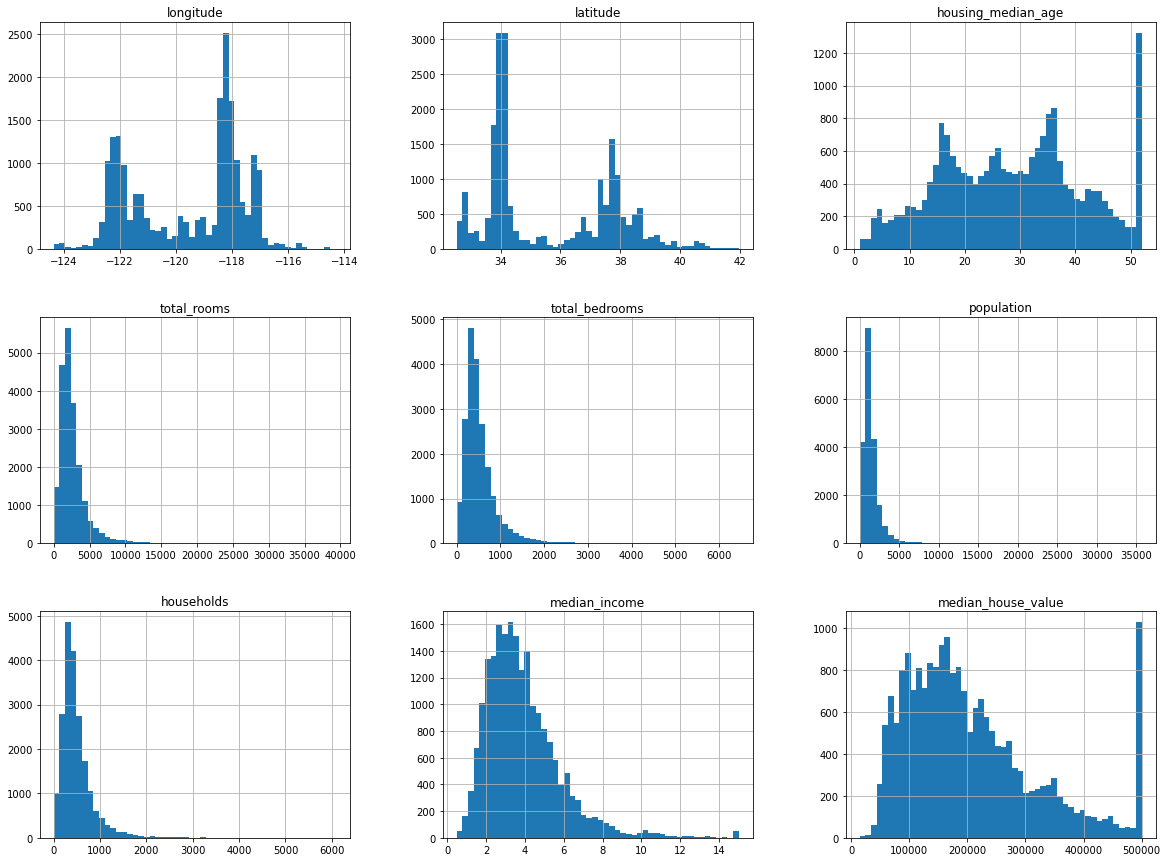

In [7]:
housing_ds.hist(bins=50,figsize=(20,15))

for small dataset sometime we have to ensure that train set is reprenstive of whole population 
here we assume median income is paramount in predicting house value so we will try to stratifi train set on basis of population set 

<AxesSubplot:>

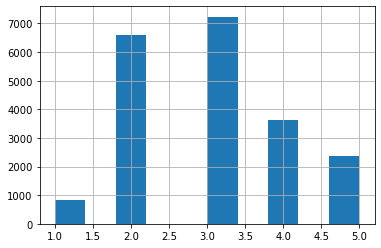

In [8]:
housing_ds["income_cat"]=pd.cut(housing_ds["median_income"],bins=[0.0,1.5,3.0,4.5,6.0,float("inf")],labels=[1,2,3,4,5])
housing_ds["income_cat"].hist()

In [9]:
from sklearn.model_selection import train_test_split,StratifiedShuffleSplit
rand_train,rand_test=train_test_split(housing_ds,test_size=0.2,random_state=42)

In [10]:
#StratifiedShuffeledSplit is an cross validation object 
strat_obj=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42) #n_split is number of cross validation set
for train_index,test_index in strat_obj.split(housing_ds,housing_ds["income_cat"]):
    strat_train=housing_ds.loc[train_index]
    strat_test=housing_ds.loc[test_index]
for i in (strat_train,strat_test):  #removing income cat column
    i.drop("income_cat",axis=1,inplace=True)
    


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

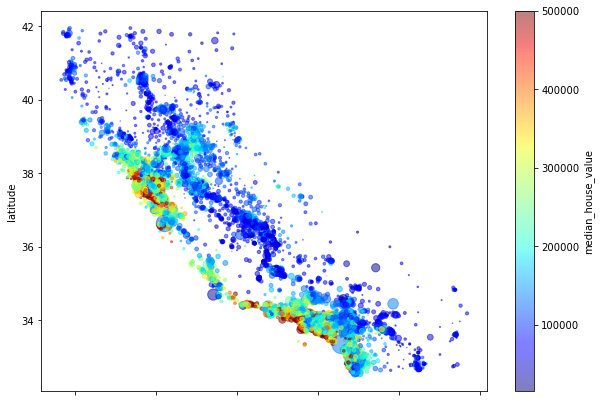

In [11]:
housing_ds.plot(kind="scatter",x="longitude",y="latitude",alpha=0.5,
             s=housing_ds["population"]/100,figsize=(10,7),
             c="median_house_value",cmap="jet",colorbar=True)

In [12]:
corr_matrix=housing_ds.corr() # creating correlation matrix
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>]],
      dtype=object)

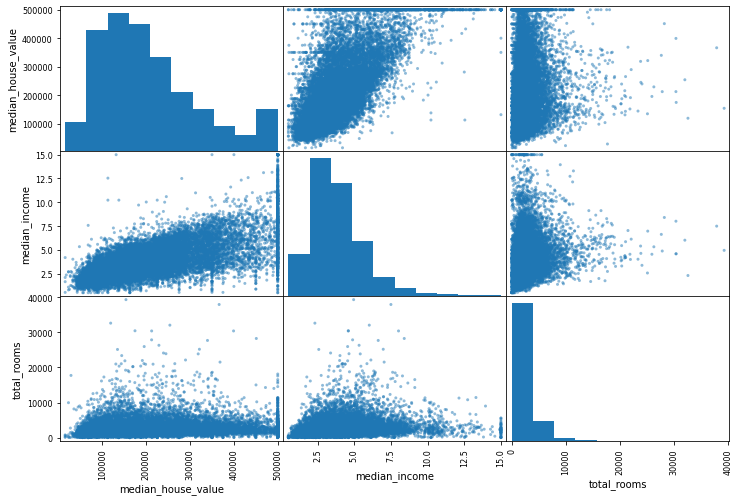

In [13]:
from pandas.plotting import scatter_matrix     #to make scatter plot of some attributes  you may find impb
attributes=["median_house_value","median_income","total_rooms"]
scatter_matrix(housing_ds[attributes],figsize=(12,8))

In [14]:
#experimenting with data extracting new data by manupilating  is called feature enggenering lets crereate three new data points
housing_ds["rooms_per_house"]=housing_ds["total_rooms"]/housing_ds["households"]
housing_ds["bedroom_per_house"]=housing_ds["total_bedrooms"]/housing_ds["households"]
housing_ds["rooms_per_bedroom"]=housing_ds["total_rooms"]/housing_ds["total_bedrooms"]
housing_ds["population_per_household"]=housing_ds["population"]/housing_ds["households"]


In [15]:
corr_matrix=housing_ds.corr() # creating correlation matrix
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_bedroom           0.383920
rooms_per_house             0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
bedroom_per_house          -0.046739
latitude                   -0.144160
Name: median_house_value, dtype: float64

# Preparing Data for learning

In [16]:
train_set=strat_train.drop("median_house_value",axis=1)
train_label=strat_train["median_house_value"].copy()

In [17]:
#filling incomplet data 
#1 delete row usind dropna(subset=["attribute"])
#2 delete whole attribure drop("attribute",axis=1,inplace=True) 
#3 fill na with median or anything
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="median") 
#imputer fit and transform method work only on numrical values so will have ot strip ocean proximity first
train_set_num=train_set.drop("ocean_proximity",axis=1)
train_set_alpha=train_set[["ocean_proximity"]]
imputer.fit(train_set_num) #coumputing median of all colums
imputer.statistics_  #we can see computed values match median of colums


array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [18]:
train_set_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [19]:
#now lets transform our dataset acc to imputer
x=imputer.transform(train_set_num)  #return numpy aarray 
housing_tr=pd.DataFrame(x,columns=train_set_num.columns,index=train_set_num.index) #converting back to dataframe

In [20]:
train_set_alpha.head


<bound method NDFrame.head of       ocean_proximity
13096        NEAR BAY
14973       <1H OCEAN
3785           INLAND
14689          INLAND
20507      NEAR OCEAN
...               ...
14207       <1H OCEAN
13105          INLAND
19301      NEAR OCEAN
19121       <1H OCEAN
19888      NEAR OCEAN

[16512 rows x 1 columns]>

In [21]:
# we need to convert ocean proximity in numeric values for algorith to work 
# because it is inorder value we will use one hot encoder to represent values
from sklearn.preprocessing import OneHotEncoder
cat_encoder=OneHotEncoder()
one_hot=cat_encoder.fit_transform(train_set_alpha)

In [22]:
one_hot #sparse matrix

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

#coustom function just add BaseEstimator and TransformerMixin class and have fit transform function defiend

In [23]:
from sklearn.base import BaseEstimator,TransformerMixin
import numpy as np
rooms_ix,bedroom_ix,population_ix,household_ix=3,4,5,6
class CombinedAttributes(BaseEstimator,TransformerMixin):
    def __init__(self,add_bedroom=True):
        self.add_bedroom=add_bedroom
    def fit(self,X,y=None):
        return self
    def transform(self,x):
        rooms_per_household=x[:,rooms_ix]/x[:,household_ix]
        population_per_household=x[:,population_ix]/x[:,household_ix]
        if self.add_bedroom:
            room_per_bedroom=x[:,rooms_ix]/x[:,bedroom_ix]
            return np.c_[x,rooms_per_household,population_per_household,room_per_bedroom]
        return np.c_[x,rooms_per_household,population_per_household]
            
            

In [24]:
inst=CombinedAttributes()
temp=inst.fit_transform(train_set_num.values)
type(temp)
temp[:1]
temp=pd.DataFrame(temp)

In [25]:
housing_ds[['median_house_value']][:3]

,median_house_value
0,452600.0
1,358500.0
2,352100.0


In [26]:
from sklearn.preprocessing import StandardScaler
temp1=StandardScaler()  #works for both numpy array and dataframe but returns numpy array 
temp1.fit_transform(temp)[:,1]

array([ 1.0136059 , -0.702103  ,  1.27611874, ..., -1.42870103,
       -0.73960483,  0.94797769])

In [27]:
#Transformation pipelines 
from sklearn.pipeline import Pipeline
num_pipeline=Pipeline([
    ("imputer",SimpleImputer(strategy="median")),
    ("attributes_adder",CombinedAttributes()),
    ("std_scaler",StandardScaler())
])


In [28]:
temp2=num_pipeline.fit_transform(train_set_num)
temp2.shape
print(list(train_set_num))


['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']


In [29]:
train_set.info

<bound method DataFrame.info of        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
13096    -122.42     37.80                52.0       3321.0          1115.0   
14973    -118.38     34.14                40.0       1965.0           354.0   
3785     -121.98     38.36                33.0       1083.0           217.0   
14689    -117.11     33.75                17.0       4174.0           851.0   
20507    -118.15     33.77                36.0       4366.0          1211.0   
...          ...       ...                 ...          ...             ...   
14207    -118.40     33.86                41.0       2237.0           597.0   
13105    -119.31     36.32                23.0       2945.0           592.0   
19301    -117.06     32.59                13.0       3920.0           775.0   
19121    -118.40     34.06                37.0       3781.0           873.0   
19888    -122.41     37.66                44.0        431.0           195.0   

       population  

In [30]:
from sklearn.compose import ColumnTransformer
num_attributes=list(train_set_num)
cat_attributes=["ocean_proximity"]
full_pipeline=ColumnTransformer([
    ("num_pipe", num_pipeline,num_attributes),
    ("cat_pipe",OneHotEncoder(),cat_attributes)
])
housing_prepared=full_pipeline.fit_transform(train_set)
housing_prepared.shape


(16512, 16)

# training and testing model

In [33]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression 
lin_reg=LinearRegression()
lin_reg.fit(housing_prepared,train_label)


LinearRegression()

In [36]:
# lets check its performance on traning data
from sklearn.metrics import mean_squared_error
lin_predict=lin_reg.predict(housing_prepared)
lin_rmse=np.sqrt(mean_squared_error(lin_predict,train_label))
print(lin_rmse)

67841.04042949333


In [39]:
# model is underfitting the data lets try another model 
from sklearn.tree import DecisionTreeRegressor
tree_model=DecisionTreeRegressor()
tree_model.fit(housing_prepared,train_label)
tree_predict=tree_model.predict(housing_prepared)
tree_rmse=np.sqrt(mean_squared_error(tree_predict,train_label))
print(tree_rmse)

0.0


it seems to be under fitting the data but how can we confirm that


# cross validataion 

In [49]:
from sklearn.model_selection import cross_val_score
crossval_score_tree=cross_val_score(tree_model,housing_prepared,train_label,scoring="neg_mean_squared_error",cv=10)
#crossval class work on utility function ie greter is better so we have to pass neg_mean_squared function 
def print_score(score):
    score=np.sqrt(-score)
    print(score)
    print("mean",score.mean())
    print("std",score.std())

In [46]:
print_score(crossval_score_tree)

[68209.59222212 67725.52470651 68982.90428174 73700.09362961
 69584.60926065 70050.23556105 71164.49067092 71949.38263514
 68949.83301707 69444.06341855]
mean 69976.07294033554
std 1727.4654795765653


In [50]:
crossval_score_lin=cross_val_score(lin_reg,housing_prepared,train_label,scoring="neg_mean_squared_error",cv=10)
print_score(crossval_score_lin)

[69484.12451189 66864.7938118  66733.75418121 68495.78599302
 67076.37433585 68924.28421616 67046.95718402 69901.61388763
 67269.46160623 68001.54909375]
mean 67979.8698821567
std 1100.0885907705187


In [51]:
from sklearn.ensemble import RandomForestRegressor
forest_reg=RandomForestRegressor()
crossval_score_randomtree=cross_val_score(forest_reg,housing_prepared,train_label,scoring="neg_mean_squared_error",cv=10)
print_score(crossval_score_randomtree)

[48761.76244505 49705.06192847 47608.00195918 50102.95048673
 48770.28510472 49748.96727539 50457.86486745 51283.92994895
 50496.76472367 50062.90707561]
mean 49699.849581521616
std 1006.7589778784936


In [54]:
tree_model.predict(full_pipeline.fit_transform(train_set.loc[:5]))

array([ 55000., 500001., 102200., ..., 131000., 108700., 269700.])

In [56]:
# random forest took lot of time to compute so we will pickel its model or class instance
import joblib
joblib.dump(crossval_score_lin,"random_tree_score")

['random_tree_score']

In [58]:
my_model_load=joblib.load("random_tree_score")
print_score(my_model_load)

[48761.76244505 49705.06192847 47608.00195918 50102.95048673
 48770.28510472 49748.96727539 50457.86486745 51283.92994895
 50496.76472367 50062.90707561]
mean 49699.849581521616
std 1006.7589778784936


In [61]:
#testing data 
test_set=strat_test.drop("median_house_value",axis=1)
test_label=strat_test["median_house_value"].copy()
prepare_test=full_pipeline.fit_transform(test_set)
forest_reg.fit(housing_prepared,train_label)

RandomForestRegressor()

In [63]:
predict_random=forest_reg.predict(prepare_test)
rmse=np.sqrt(mean_squared_error(predict_random,test_label))
print(rmse)

59743.248111378365
